In [0]:
import chess.pgn
import csv

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
pgn = open("/content/drive/My Drive/ChessDataset/lichess_db_standard_rated_2013-01.pgn", encoding="utf-8-sig")
test_pgn = open("/content/drive/My Drive/ChessDataset/test.pgn", encoding="utf-8-sig")

In [0]:
first_game = chess.pgn.read_game(test_pgn)
second_game = chess.pgn.read_game(test_pgn)
third_game = chess.pgn.read_game(test_pgn)

In [0]:
headers = ["Event","Site","White","Black","Result","UTCDate","UTCTime","WhiteElo","BlackElo","WhiteRatingDiff","BlackRatingDiff","ECO","Opening","TimeControl","Termination"]
col_headers = ["Event","Site","White","Black","Result","UTCDate","UTCTime","WhiteElo","BlackElo","WhiteRatingDiff","BlackRatingDiff","ECO","Opening","TimeControl","Termination","Move"]

In [0]:
chess_game = chess.pgn.read_game(pgn)
if "Move" in chess_game.headers:
  print("a")
else:
  print("b")

b


In [0]:
with open("gameData.csv", "w", newline='') as f:
  writer = csv.writer(f, delimiter=',')
  writer.writerow(col_headers) 
  while(True):
    chess_game = chess.pgn.read_game(pgn)
    if chess_game is None:
      break
    row=[]
    for header in headers:
      if header in chess_game.headers:
        row.append(chess_game.headers[header])
      else:
        row.append(0)
    moves = ''
    for move in chess_game.main_line():
      moves+= str(move) +' '
    row.append(moves)
    writer.writerow(row)

In [0]:
first_game = chess.pgn.read_game(pgn)
second_game = chess.pgn.read_game(pgn)
third_game = chess.pgn.read_game(pgn)

In [0]:
third_game.headers

Headers(Event='Rated Blitz game', Site='https://lichess.org/fl7asfa0', Date='????.??.??', Round='?', White='tiggran', Black='arion_6', Result='0-1', BlackElo='1500', BlackRatingDiff='+196', ECO='C53', Opening='Italian Game: Classical Variation, Giuoco Pianissimo', Termination='Normal', TimeControl='300+0', UTCDate='2012.12.31', UTCTime='23:02:14', WhiteElo='1541', WhiteRatingDiff='-8')

In [0]:
first_game.headers

Headers(Event='Rated Classical game', Site='https://lichess.org/j1dkb5dw', Date='????.??.??', Round='?', White='BFG9k', Black='mamalak', Result='1-0', BlackElo='1403', BlackRatingDiff='-8', ECO='C00', Opening='French Defense: Normal Variation', Termination='Normal', TimeControl='600+8', UTCDate='2012.12.31', UTCTime='23:01:03', WhiteElo='1639', WhiteRatingDiff='+5')

In [0]:
import pandas as pd 

df = pd.read_csv("/content/gameData.csv")

In [0]:
playerDF = df.groupby('White').agg(lambda x: x.tolist()).reset_index()

In [0]:
playerDF['len'] = playerDF['WhiteElo'].str.len()


In [0]:
playerDF = playerDF.sort_values(by='len', ascending=False).drop(columns='len')

In [0]:
newDF = playerDF.head(3)
nameList = list(newDF['White'])
newDF['White']
newDF.to_csv('playerData.csv')

In [76]:
x=pd.DataFrame(newDF['WhiteElo'])
newDF['White']

2621             german11
3333         nichiren1967
573     F1_ALONSO_FERRARI
Name: White, dtype: object

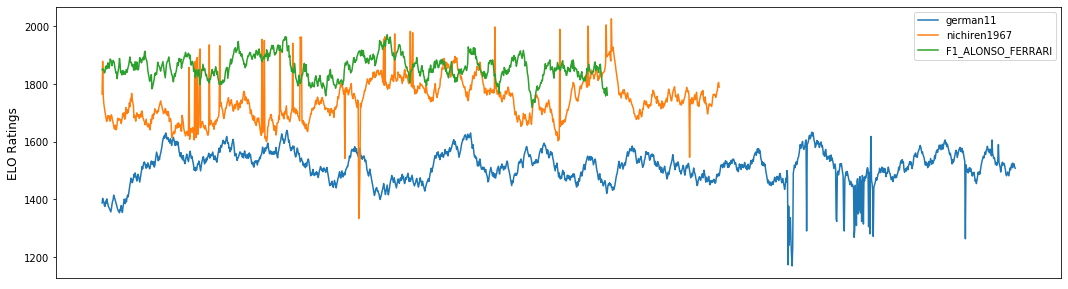

In [103]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,5))
plt.gca().axes.get_xaxis().set_visible(False)
for index, row in newDF.iterrows(): 
    y2= (list(map(int, row["WhiteElo"])))
    plt.plot( y2, label = "line 2") 
    # plt.gca().legend(row['White'],loc='upper left')
plt.ylabel('ELO Ratings', fontsize=12);
plt.legend(nameList);

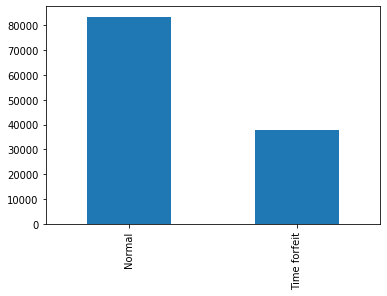

In [34]:
pd.value_counts(df['Termination']).plot.bar()